In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
# Load dataset
data = pd.read_csv('loan_data.csv')

# Fill missing values (fix deprecation warning)
data.ffill(inplace=True)

# Drop Loan_ID column as it’s not useful for prediction
data = data.drop(columns=['Loan_ID'])

In [3]:
# Encode categorical variables
label_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
le = LabelEncoder()
for col in label_cols:
    data[col] = le.fit_transform(data[col])

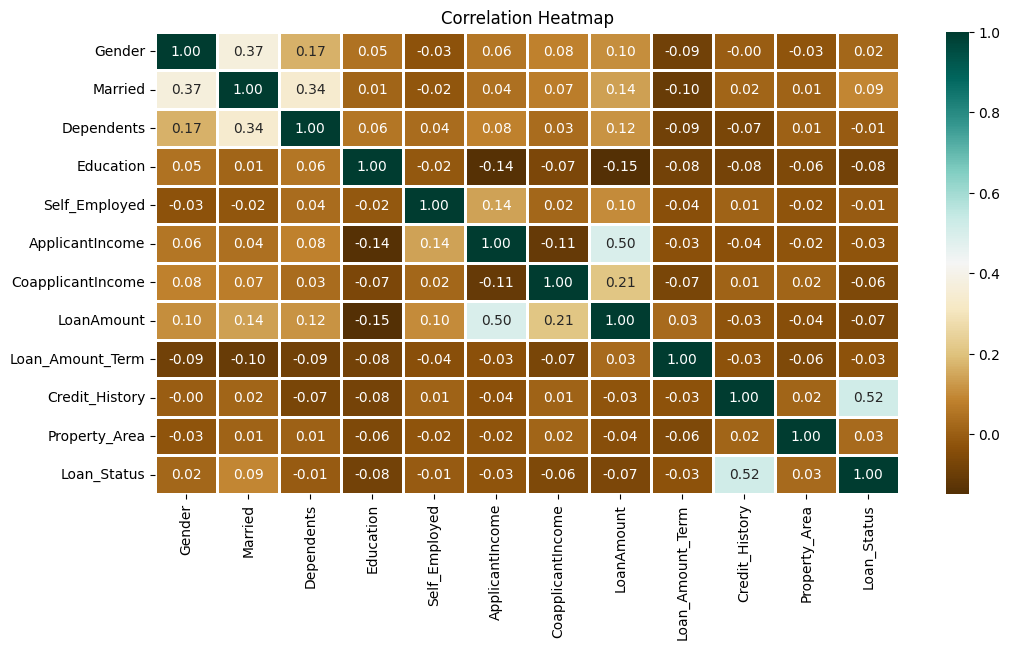

In [4]:
# Correlation Heatmap
plt.figure(figsize=(12,6))
sns.heatmap(data.corr(), cmap='BrBG', annot=True, fmt='.2f', linewidths=2)
plt.title('Correlation Heatmap')
plt.show()

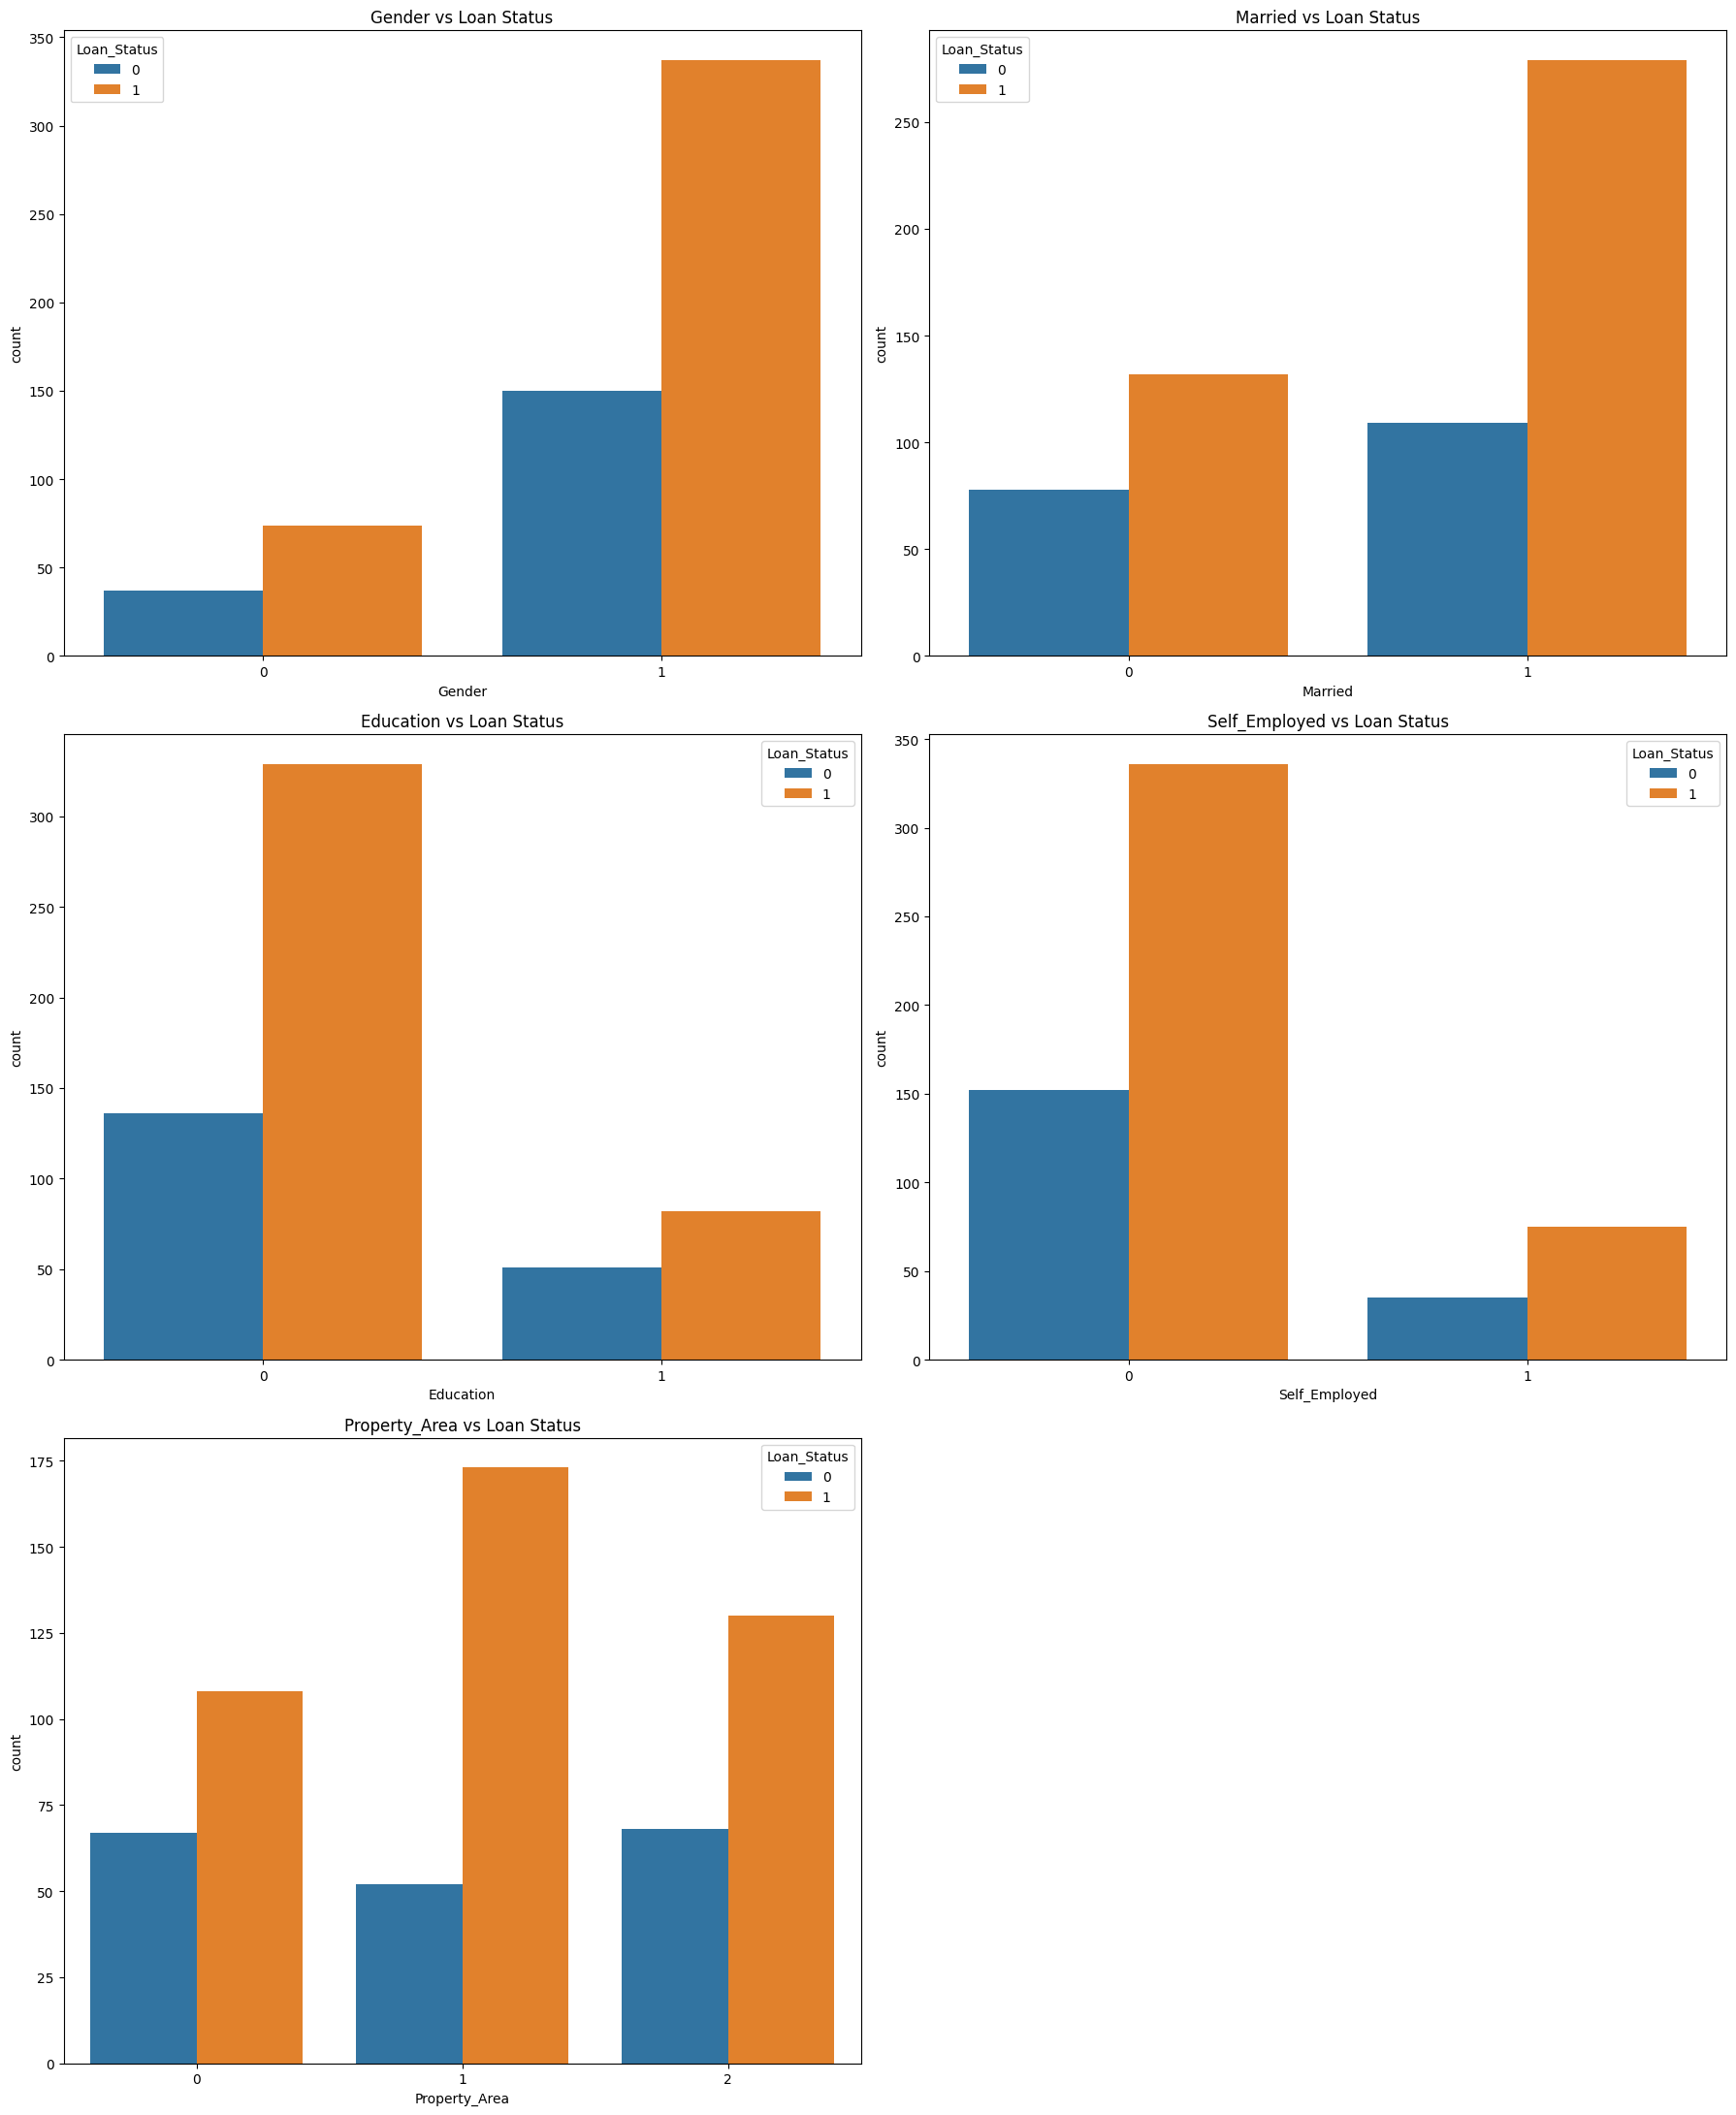

In [5]:
# Bar plots for categorical variables vs Loan Status
categorical_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']
plt.figure(figsize=(18, 36))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(5, 2, i)
    sns.countplot(x=col, hue='Loan_Status', data=data)
    plt.title(f'{col} vs Loan Status')
    plt.tight_layout()
plt.show()

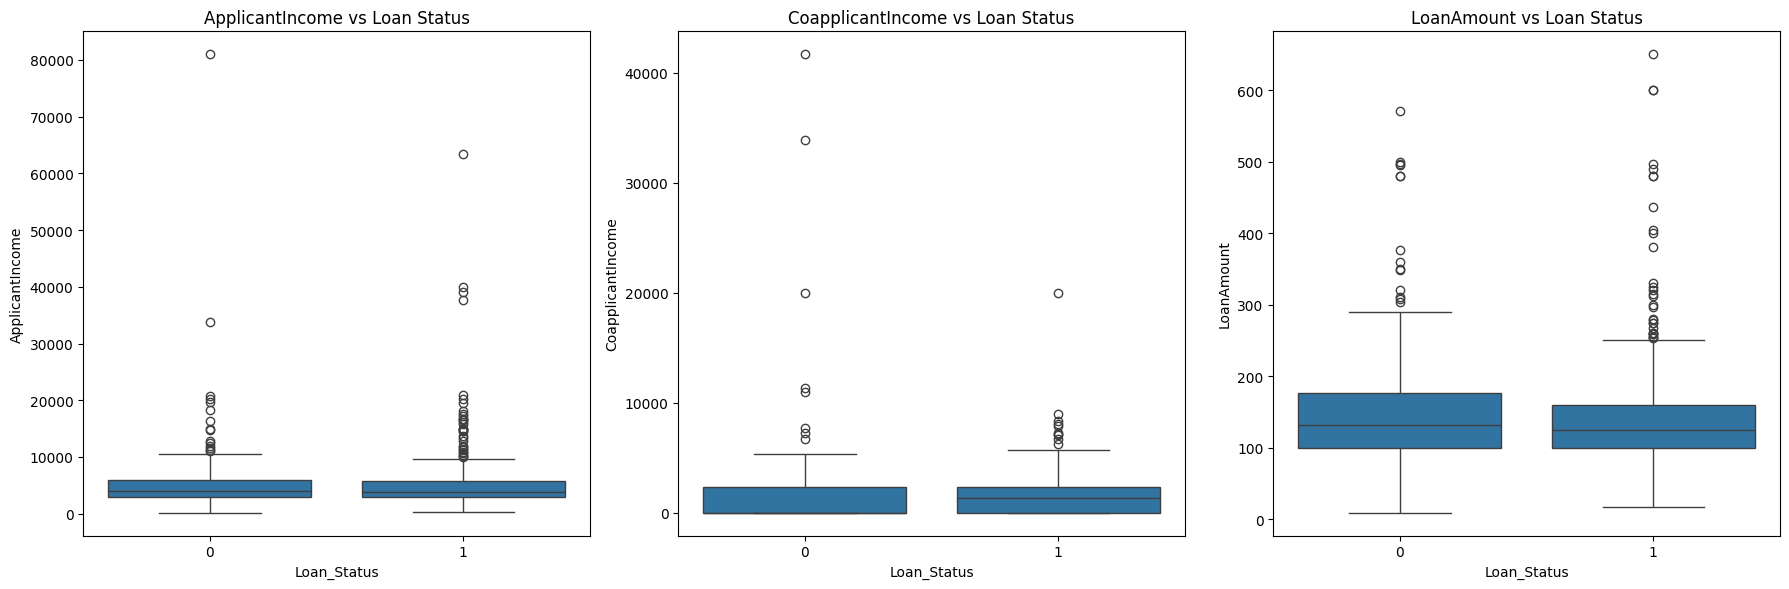

In [6]:
# Box plots for numerical variables by Loan Status
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
plt.figure(figsize=(18, 6))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='Loan_Status', y=col, data=data)
    plt.title(f'{col} vs Loan Status')
    plt.tight_layout()
plt.show()

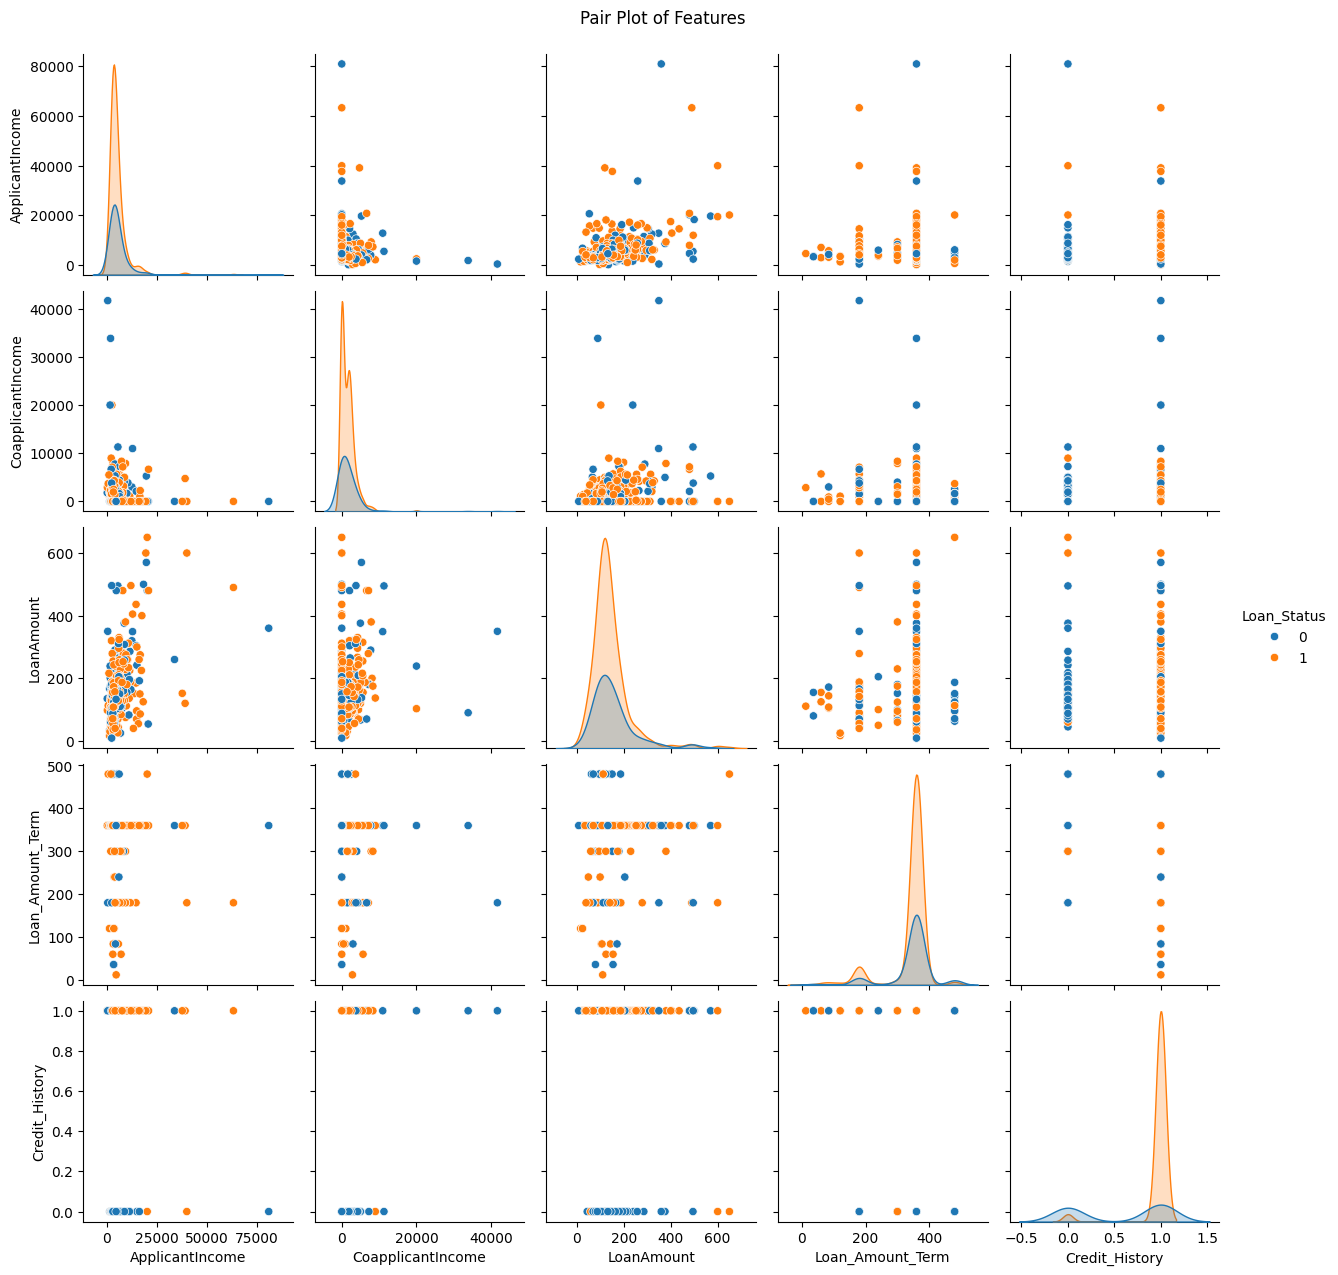

In [7]:
# Pair plot of selected features with Loan Status hue
sns.pairplot(data[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Loan_Status']], hue='Loan_Status')
plt.suptitle('Pair Plot of Features', y=1.02)
plt.show()

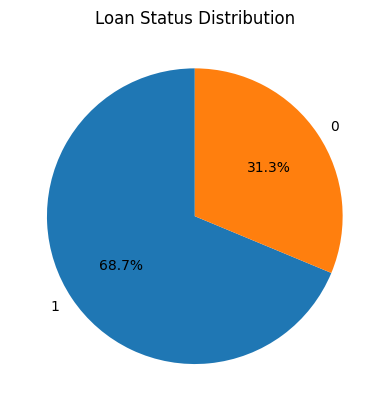

In [8]:
# Pie chart of Loan Status distribution
loan_status_counts = data['Loan_Status'].value_counts()
plt.pie(loan_status_counts, labels=loan_status_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Loan Status Distribution')
plt.show()

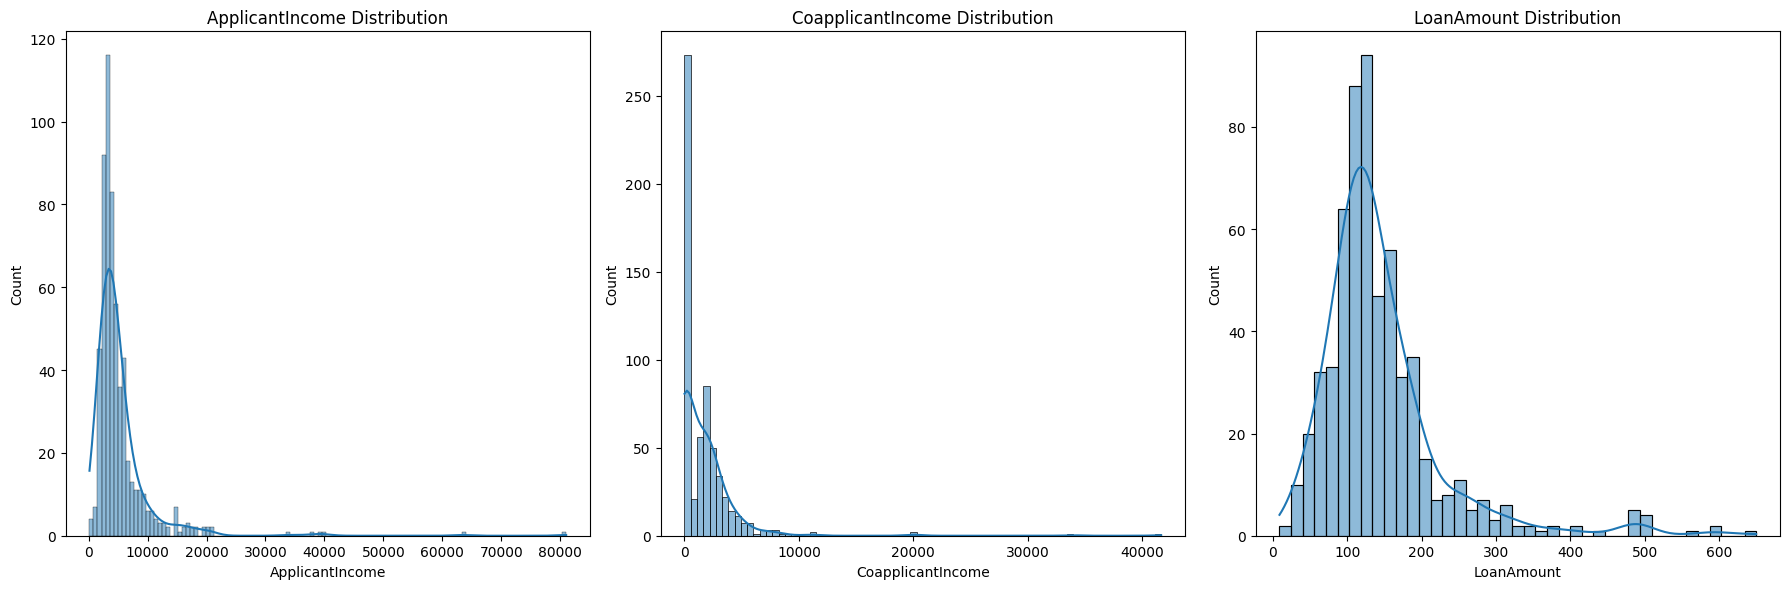

In [9]:
# Distribution plots for numerical variables
plt.figure(figsize=(18, 6))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1, 3, i)
    sns.histplot(data[col], kde=True)
    plt.title(f'{col} Distribution')
    plt.tight_layout()
plt.show()

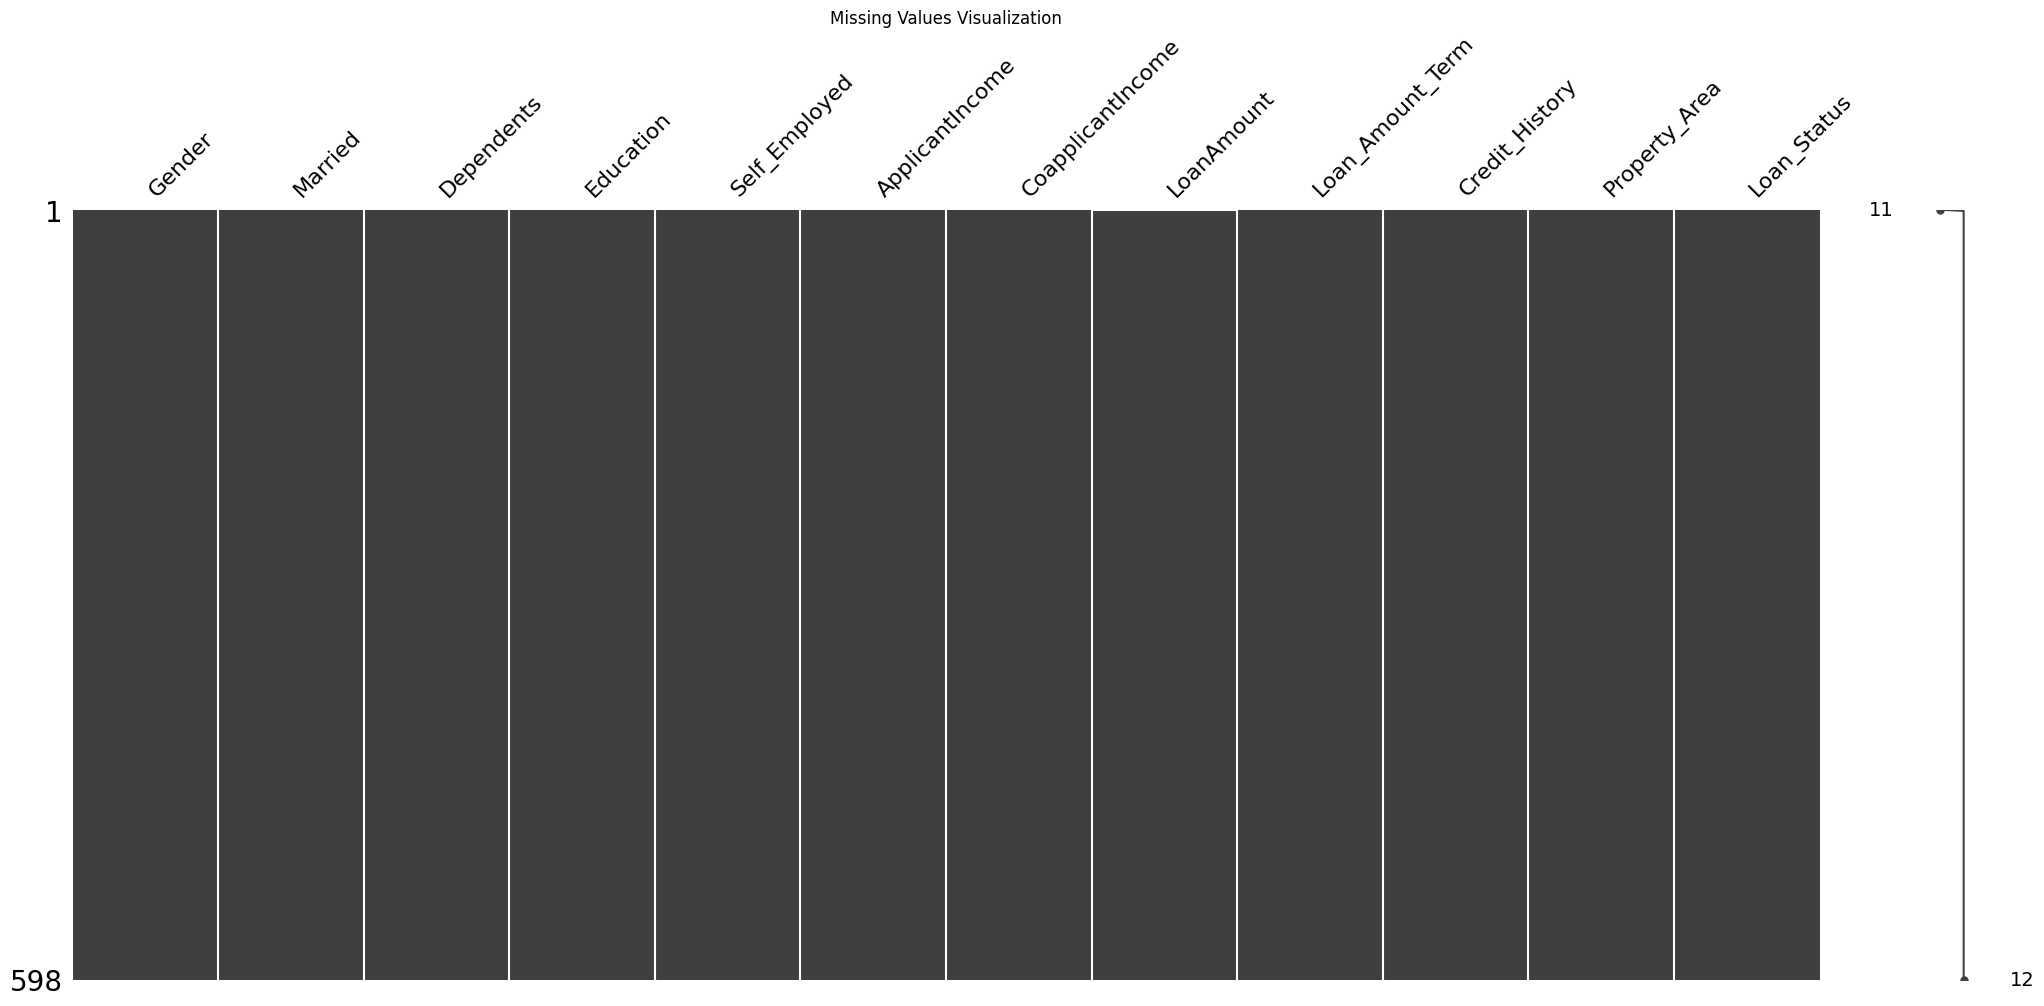

In [10]:
# Missing values visualization
msno.matrix(data)
plt.title('Missing Values Visualization')
plt.show()

In [11]:
# Prepare data for model training
X = data.drop('Loan_Status', axis=1)
y = data['Loan_Status']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

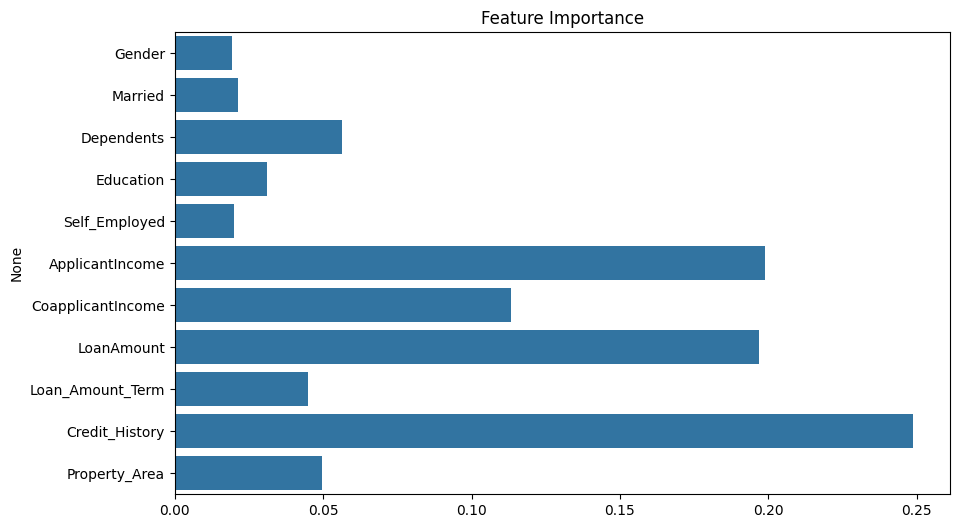

In [12]:
# Initialize and train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Feature Importance Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=model.feature_importances_, y=X.columns)
plt.title('Feature Importance')
plt.show()

In [13]:
# Predict on test data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 78.33%
